In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading train/test data 

In [2]:
df = pd.read_csv('hearttrain.csv')
df.head()

,Age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,label
0,53,1,4,130.0,182.0,0.0,0,148.0,0.0,0.0,NaN,NaN,NaN,0
1,34,1,1,118.0,182.0,0.0,2,174.0,0.0,0.0,1.0,0,3,0
2,44,0,3,108.0,141.0,0.0,0,175.0,0.0,0.6,2.0,0,3,0
3,48,0,2,120.0,284.0,0.0,0,120.0,0.0,0.0,NaN,NaN,NaN,0
4,62,0,4,124.0,209.0,0.0,0,163.0,0.0,0.0,1.0,0,3,0


In [3]:
df.shape

(359, 14)

In [4]:
df_test= pd.read_csv('hearttest.csv')

In [5]:
df_all = df.append(df_test, sort=False)

In [6]:
df_all.describe()

,Age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,label
count,392.000000,392.000000,392.000000,391.000000,374.000000,386.000000,392.000000,391.000000,391.000000,392.000000,235.000000,359.000000
mean,50.153061,0.627551,2.775510,130.462916,242.911765,0.088083,0.586735,150.774936,0.158568,0.459694,1.480851,0.094708
std,9.185335,0.484075,0.921809,16.760547,53.906286,0.283783,0.862772,21.996281,0.365741,0.763628,0.587126,0.293219
min,28.000000,0.000000,1.000000,94.000000,85.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000
25%,43.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000
50%,51.000000,1.000000,3.000000,130.000000,237.500000,0.000000,0.000000,152.000000,0.000000,0.000000,1.000000,0.000000
75%,56.000000,1.000000,4.000000,140.000000,273.000000,0.000000,1.250000,168.000000,0.000000,0.800000,2.000000,0.000000
max,76.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,1.000000


## missing values handling

In [7]:
df_all.isnull().sum()

Age                        0
sex                        0
chest pain                 0
blood pressure             1
cholestoral               18
blood sugar                6
electrocardiographic       0
heart rate                 1
exercise induced           1
depression                 0
slope                    157
ca                       185
thal                     173
label                     33
dtype: int64

In [8]:
df_all.isnull().mean()

Age                      0.000000
sex                      0.000000
chest pain               0.000000
blood pressure           0.002551
cholestoral              0.045918
blood sugar              0.015306
electrocardiographic     0.000000
heart rate               0.002551
exercise induced         0.002551
depression               0.000000
slope                    0.400510
ca                       0.471939
thal                     0.441327
label                    0.084184
dtype: float64

In [9]:
df_all[df_all=='?'] = np.nan

C:\Program Files\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [10]:
df_all.dtypes

Age                        int64
sex                        int64
chest pain                 int64
blood pressure           float64
cholestoral              float64
blood sugar              float64
electrocardiographic       int64
heart rate               float64
exercise induced         float64
depression               float64
slope                    float64
ca                        object
thal                      object
label                    float64
dtype: object

In [11]:
df_all['ca'].fillna('0', inplace=True)
df_all['thal'].fillna('0', inplace=True)

In [12]:
df_all.columns

Index(['Age', 'sex', 'chest pain', 'blood pressure', 'cholestoral ',
       'blood sugar', 'electrocardiographic ', 'heart rate',
       'exercise induced', 'depression ', 'slope', 'ca', 'thal', 'label'],
      dtype='object')

In [13]:
df_all['cholestoral '] = df_all['cholestoral '].fillna(df_all['cholestoral '].mean())
df_all[[ 'blood pressure','blood sugar', 'heart rate',
       'exercise induced', 'slope']]= df_all[[ 'blood pressure',
       'blood sugar', 'heart rate',
       'exercise induced', 'slope']].fillna(-1)

In [14]:
df_all.isnull().sum()

Age                       0
sex                       0
chest pain                0
blood pressure            0
cholestoral               0
blood sugar               0
electrocardiographic      0
heart rate                0
exercise induced          0
depression                0
slope                     0
ca                        0
thal                      0
label                    33
dtype: int64

### plotting 

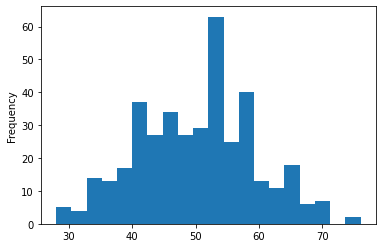

In [15]:
df_all.Age.plot.hist(bins=20)

In [16]:
df_all.sex.value_counts()

1    246
0    146
Name: sex, dtype: int64

In [17]:
df_all['chest pain'].value_counts()

2    142
3    118
4    106
1     26
Name: chest pain, dtype: int64

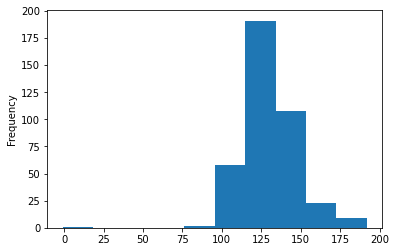

In [18]:
df_all['blood pressure'].plot.hist()

In [19]:
df_all['blood sugar'].value_counts()

 0.0    352
 1.0     34
-1.0      6
Name: blood sugar, dtype: int64

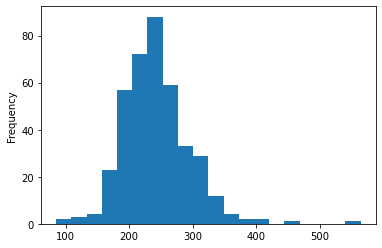

In [20]:
df_all['cholestoral '].plot.hist(bins=20)

In [21]:
df_all['exercise induced'].value_counts()

 0.0    329
 1.0     62
-1.0      1
Name: exercise induced, dtype: int64

In [22]:
df_all['thal'].value_counts()

0      174
3      138
7       48
6       13
3.0     13
7.0      6
Name: thal, dtype: int64

In [23]:
df_all['electrocardiographic '].value_counts()

0    260
2     98
1     34
Name: electrocardiographic , dtype: int64

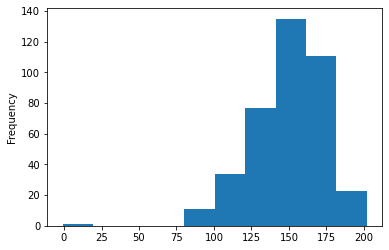

In [24]:
df_all['heart rate'].plot.hist()

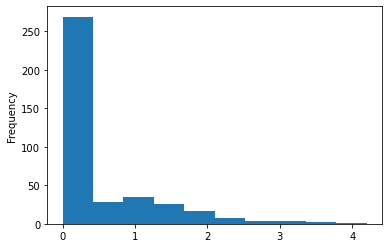

In [25]:
df_all['depression '].plot.hist()

In [26]:
df_all['slope'].value_counts()

-1.0    157
 1.0    133
 2.0     91
 3.0     11
Name: slope, dtype: int64

In [27]:
df_all['ca'].unique()

array(['0', '2', '1', '3', '9', 0.0, 1.0, 3.0, 2.0], dtype=object)

In [28]:
df_all['thal'].unique()

array(['0', '3', '6', '7', 3.0, 7.0], dtype=object)

In [29]:
df_all.label.value_counts()

0.0    325
1.0     34
Name: label, dtype: int64

In [30]:
df_all.label.unique()

array([ 0.,  1., nan])

# Normalizing

In [31]:
df.columns

Index(['Age', 'sex', 'chest pain', 'blood pressure', 'cholestoral ',
       'blood sugar', 'electrocardiographic ', 'heart rate',
       'exercise induced', 'depression ', 'slope', 'ca', 'thal', 'label'],
      dtype='object')

In [32]:
#from sklearn.preprocessing import StandardScaler 
#sscaler = StandardScaler()
#df[['Age', 'blood pressure', 'cholestoral ', 'heart rate']] = sscaler.fit_transform(df[['Age', 'blood pressure', 'cholestoral ', 'heart rate']])

In [33]:
from sklearn.preprocessing import MinMaxScaler

mscaler = MinMaxScaler()
#df[['Age', 'blood pressure', 'cholestoral ', 'heart rate']] = mscaler.fit_transform(df[['Age', 'blood pressure', 'cholestoral ', 'heart rate']])

In [34]:
df_all.iloc[:, :-1] = mscaler.fit_transform(df_all.iloc[:,:-1])

#### Change type of 'ca' and thal

In [35]:
df_all['ca'] = pd.to_numeric(df_all['ca'])

In [36]:
df_all['thal'] = pd.to_numeric(df_all['thal'])

## Split df and df_test

In [37]:
df, df_test = df_all[:len(df)], df_all[len(df):]
df_test = df_test.drop('label', axis=1)

In [38]:
df_test.head()

,Age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal
0,0.500000,0.0,0.333333,0.626943,0.260960,0.5,0.0,0.733990,0.5,0.000000,0.00,0.000000,0.000000
1,0.333333,1.0,0.666667,0.730570,0.313152,0.5,1.0,0.891626,0.5,0.000000,0.50,0.000000,0.428571
2,0.604167,1.0,0.666667,0.668394,0.300626,0.5,1.0,0.743842,0.5,0.095238,0.75,0.111111,1.000000
3,0.541667,0.0,0.333333,0.626943,0.302714,1.0,0.0,0.694581,0.5,0.000000,0.00,0.000000,0.000000
4,0.625000,1.0,1.000000,0.668394,0.273486,0.5,1.0,0.650246,1.0,0.523810,0.75,0.333333,1.000000


In [39]:
df.head()

,Age,sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,label
0,0.520833,1.0,1.000000,0.678756,0.202505,0.5,0.0,0.733990,0.5,0.000000,0.00,0.0,0.000000,0.0
1,0.125000,1.0,0.000000,0.616580,0.202505,0.5,1.0,0.862069,0.5,0.000000,0.50,0.0,0.428571,0.0
2,0.333333,0.0,0.666667,0.564767,0.116910,0.5,0.0,0.866995,0.5,0.142857,0.75,0.0,0.428571,0.0
3,0.416667,0.0,0.333333,0.626943,0.415449,0.5,0.0,0.596059,0.5,0.000000,0.00,0.0,0.000000,0.0
4,0.708333,0.0,1.000000,0.647668,0.258873,0.5,0.0,0.807882,0.5,0.000000,0.50,0.0,0.428571,0.0


### Define X and y

In [40]:
X = df.drop('label', axis=1)
y = df['label']

# Define evaluation metric

In [41]:
from sklearn.metrics import recall_score

def mymetric(y, yhat): 
    rec0 = 0.35 * (recall_score(y, yhat, pos_label=0))
    rec1 = 0.65 * (recall_score(y, yhat, pos_label=1))
    return (rec0 + rec1)

In [42]:
from sklearn.metrics import make_scorer 
custom_score = make_scorer(mymetric, greater_is_better=True)

# Naive Bayes classifier 

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report 
gnb = GaussianNB()
gnb_pred = cross_val_predict(gnb, X, y, cv=5)
gnb_score = cross_val_score(gnb, X, y, cv=5, scoring=custom_score)

print(gnb_score.mean())
print(classification_report(y, gnb_pred))

0.763
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       325
         1.0       0.38      0.71      0.49        34

    accuracy                           0.86       359
   macro avg       0.67      0.79      0.71       359
weighted avg       0.91      0.86      0.88       359



### KNN Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, leaf_size=5, weights='uniform')
knn_pred = cross_val_predict(knn, X, y, cv = 20)
knn_score = cross_val_score(knn, X, y, cv=20, scoring=custom_score)

print(knn_score.mean())
print(classification_report(y, knn_pred))

0.5819117647058824
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       325
         1.0       0.54      0.38      0.45        34

    accuracy                           0.91       359
   macro avg       0.74      0.67      0.70       359
weighted avg       0.90      0.91      0.90       359



In [45]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors': [ 3, 5, 7, 9, 11, 13, 15, 17],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'auto', 'brute'],
              'leaf_size': [5, 10,15, 20, 30, 40, 50, 60, 70]
}

knngrid =GridSearchCV(knn, param_grid=parameters, scoring=custom_score, cv=10)
knngrid.fit(X, y)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=5),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'auto', 'brute'],
                         'leaf_size': [5, 10, 15, 20, 30, 40, 50, 60, 70],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(mymetric))

In [46]:
knngrid.best_score_

0.6339157196969697

In [47]:
knngrid.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 5,
 'n_neighbors': 7,
 'weights': 'uniform'}

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced', max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter='random' )
dt_pred = cross_val_predict(dt, X, y, cv=5)
dt_score = cross_val_score(dt, X, y, cv=5, scoring=custom_score)

print(dt_score.mean())
print(classification_report(y, dt_pred))

0.8086007326007326
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82       325
         1.0       0.23      0.85      0.37        34

    accuracy                           0.72       359
   macro avg       0.61      0.78      0.59       359
weighted avg       0.91      0.72      0.78       359



In [49]:
treepars = {'criterion': ['gini', 'entropy'],
           'splitter': ['best', 'random'],
           'max_depth': [5, 7, 10, 15, 20, 18, 25, 30, 14, 12, 11, 19],
           'min_samples_split': [2, 3, 5, 7, 4, 6, 10, 8, 9, 12, 15, 14, 13, 11, 16, 18, 20],
           'min_samples_leaf': [2, 3, 4, 5,7,9,11, 10,12, 14, 15, 18, 19, 20],
           }

treegcv = GridSearchCV(dt, param_grid=treepars, cv=5, scoring=custom_score)

treegcv.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=25,
                                              min_samples_leaf=3,
                                              min_samples_split=7,
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 15, 20, 18, 25, 30, 14, 12, 11,
                                       19],
                         'min_samples_leaf': [2, 3, 4, 5, 7, 9, 11, 10, 12, 14,
                                              15, 18, 19, 20],
                         'min_samples_split': [2, 3, 5, 7, 4, 6, 10, 8, 9, 12,
                                               15, 14, 13, 11, 16, 18, 20],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(mymetric))

In [50]:
treegcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'splitter': 'random'}

In [51]:
treegcv.best_score_

0.7124065934065934

# SVM

In [62]:
from sklearn.svm import SVC 
svm = SVC(degree=5, kernel='poly', gamma='scale')

svm_pred = cross_val_predict(svm, X, y, cv=5)
svm_score = cross_val_score(svm, X, y, cv=5, scoring=custom_score)
print(svm_score.mean())
print(classification_report(y,svm_pred))

0.6204908424908424
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       325
         1.0       0.44      0.44      0.44        34

    accuracy                           0.89       359
   macro avg       0.69      0.69      0.69       359
weighted avg       0.89      0.89      0.89       359



In [53]:
pars = {'kernel': ['poly', 'linear', 'rbf', 'sigmoid'],
        'degree': [2, 3, 5, 7],
        'gamma': ['scale', 'auto']
    
}
svmgrid = GridSearchCV(svm, param_grid=pars, cv=5, scoring=custom_score)
svmgrid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(degree=7, gamma='auto', kernel='poly'),
             param_grid={'degree': [2, 3, 5, 7], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear', 'rbf', 'sigmoid']},
             scoring=make_scorer(mymetric))

In [54]:
svmgrid.best_params_

{'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}

In [55]:
svmgrid.best_score_

0.6204908424908424

# MLP 

In [56]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 20, 10),
                   learning_rate= 'invscaling', learning_rate_init= 0.15, max_iter= 50)

mlp_pred = cross_val_predict(mlp, X, y, cv=5)
mlp_score = cross_val_score(mlp, X, y, cv=5, scoring=custom_score)

print(mlp_score.mean())
print(classification_report(y, mlp_pred))

0.4474285714285715
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       325
         1.0       0.00      0.00      0.00        34

    accuracy                           0.91       359
   macro avg       0.45      0.50      0.48       359
weighted avg       0.82      0.91      0.86       359



C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.model_selection import GridSearchCV

par = {'hidden_layer_sizes':[(13,12), (15),(13, 10, 10)],
        'max_iter':[20,50],
       'solver': ['adam', 'lbfgs', 'sgd'], 
       'learning_rate':['invscaling','constant', 'adaptive'],
       'activation':['tanh','relu','logistic']}
GS = GridSearchCV(mlp, param_grid=par, cv=4, scoring=custom_score)
GS.fit(X, y)

C:\Program Files\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Program Files\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Program Files\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Program Files\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Program Files\Anaconda\lib\site-packages\sklearn\neural_network\_mult

GridSearchCV(cv=4,
             estimator=MLPClassifier(activation='tanh',
                                     hidden_layer_sizes=(10, 20, 10),
                                     learning_rate='invscaling',
                                     learning_rate_init=0.15, max_iter=50),
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'hidden_layer_sizes': [(13, 12), 15, (13, 10, 10)],
                         'learning_rate': ['invscaling', 'constant',
                                           'adaptive'],
                         'max_iter': [20, 50],
                         'solver': ['adam', 'lbfgs', 'sgd']},
             scoring=make_scorer(mymetric))

In [58]:
print(GS.best_score_)
print(GS.best_params_)

0.6693164709424873
{'activation': 'tanh', 'hidden_layer_sizes': (13, 10, 10), 'learning_rate': 'adaptive', 'max_iter': 50, 'solver': 'lbfgs'}


In [59]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier(n_estimators=30)
rfpred = cross_val_predict(rf, X, y, cv=5)
rfsc = cross_val_score(rf, X, y, scoring=custom_score, cv=5)

print(rfsc.mean())
print(classification_report(y, rfpred))

0.49843589743589745
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       325
         1.0       0.77      0.29      0.43        34

    accuracy                           0.92       359
   macro avg       0.85      0.64      0.69       359
weighted avg       0.92      0.92      0.91       359



In [60]:
gbc = GradientBoostingClassifier()

gbcpred = cross_val_predict(gbc, X, y, cv=5)
gbcscore = cross_val_score(gbc, X, y, cv=5, scoring=custom_score)

print(gbcscore.mean())
print(classification_report(y, gbcpred))

0.5116227106227107
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       325
         1.0       0.56      0.26      0.36        34

    accuracy                           0.91       359
   macro avg       0.74      0.62      0.66       359
weighted avg       0.89      0.91      0.90       359



In [120]:
from sklearn.ensemble import VotingClassifier

vote = VotingClassifier(estimators=[('tree', dt), ('bg', bg)])
vote_score = cross_val_score(vote, X, y, cv=5, scoring=custom_score)
votepred = cross_val_predict(vote, X, y, cv=5)

print(vote_score.mean())
print(classification_report(y, votepred))

0.7074212454212454
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       325
         1.0       0.33      0.62      0.43        34

    accuracy                           0.85       359
   macro avg       0.64      0.74      0.67       359
weighted avg       0.90      0.85      0.87       359



In [125]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(base_estimator = dt, n_estimators=70)
bgpred = cross_val_predict(dt, X, y, cv=5)
bgscore = cross_val_score(dt, X, y, cv=5, scoring=custom_score)

print(bgscore.mean())
print(classification_report(y, bgpred))

0.8080732600732601
              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88       325
         1.0       0.27      0.68      0.38        34

    accuracy                           0.79       359
   macro avg       0.61      0.74      0.63       359
weighted avg       0.89      0.79      0.83       359



# best model 

In [111]:
bestmodel = bg

bestmodel.fit(X, y)
bm_pred = bestmodel.predict(df_test)
pr_df = pd.DataFrame(bm_pred)
pr_df.to_csv('Desktop/heart/mypredbest.csv', header=None, index=False)